In [2]:
#Name: Nguyen Hung Quang Khai MAMAIU18054
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
np.random.seed(11)

In [5]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N) 
X1 = np.random.multivariate_normal(means[1], cov, N) 
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0) 
K=3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [8]:
def kmeans_display(X, label): 
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8) 
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8) 
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal') 
    plt.plot() 
    plt.show()


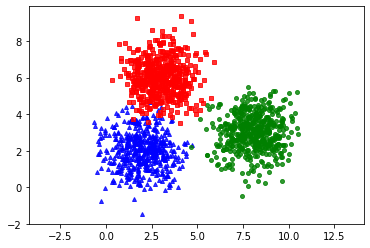

In [9]:
kmeans_display(X, original_label)

In [10]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [12]:
def kmeans_assign_labels(X, centers):
# calculate pairwise distances btw data and centers 
    D = cdist(X, centers)
# return index of the closest center
    return np.argmin(D, axis = 1)

In [13]:
def kmeans_update_centers(X, labels, K): 
    centers = np.zeros((K, X.shape[1])) 
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [15]:
def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [17]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)] 
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1])) 
        new_centers = kmeans_update_centers(X, labels[-1], K) 
        if has_converged(centers[-1], new_centers):
            break 
        centers.append(new_centers) 
        it += 1
    return (centers, labels, it)

Centroids found by the algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


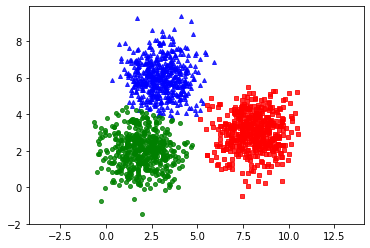

In [18]:
(centers, labels, it) = kmeans(X, K) 
print('Centroids found by the algorithm:') 
print(centers[-1])
kmeans_display(X, labels[-1])

# Exercise 1: Find out the number of iterations when the algorithm stops? Show lists of data points changing clusters for each iteration?

In [22]:
#The number of iterations when the algorithm stops
print(it)

5


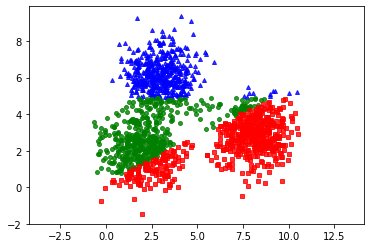

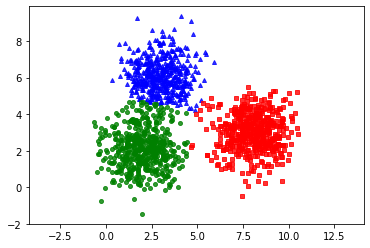

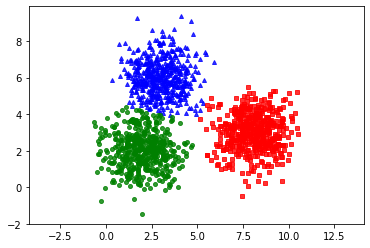

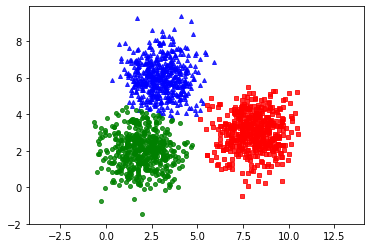

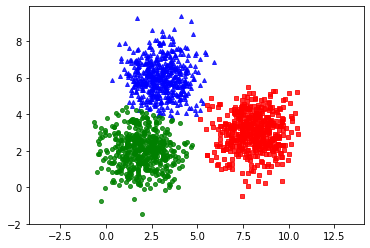

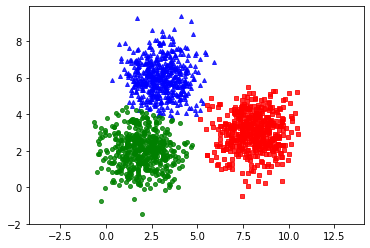

In [35]:
for i in range(6):
    kmeans_display(X, labels[i])

# Exercise 2: Propose a solution if the program is not converged? How to verify the optimal results?

The problem when K-mean do not converged is that it do not choose the good 'k'. And the

initial central points are choosed to close together, hence, here are solutions

Solution if the program is not converged:

Using elbow method to find the optimal k 

Using the K++ method to find the initial centroid points

Now I will perform the two steps

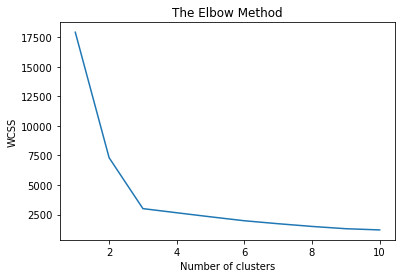

In [40]:
#Using elbow method to find the optimal k 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the plot above we see that with number of cluster 3, is the optimal one

In [41]:
#Using the K++ method to find the initial centroid points
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

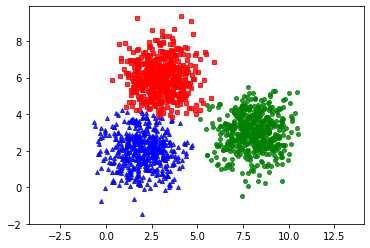

In [42]:
#Clustering by using algorithm
kmeans_display(X, y_kmeans)

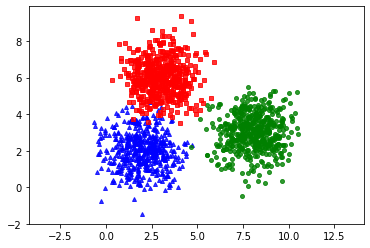

In [43]:
#The real original label
kmeans_display(X, original_label)

We can see that, the clustering using the algorithm are equivalent with the original label one